In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
#reading data
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [3]:
#checking how data looks like
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data description**<br><br>
**sex:** 1 - Man 0 - Female <br>
**cp:** chest pain type <br>
**trestbps:** resting blood pressure <br>
**chol:** serum cholestoral<br>
**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)	
**restecg:** resting electrocardiographic results<br>
**thalach:** maximum heart rate achieved<br>
**exang:** exercise induced angina (1 = yes; 0 = no)<br>
**oldpeak:** ST depression induced by exercise relative to rest	<br>
**slope:** the slope of the peak exercise ST segment	<br>
**ca:**	number of major vessels (0-3) colored by flourosopy<br>
**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect	<br>
**target:** 1 for Heart disease, otherwise 0

In [4]:
#Plotting librarys
import matplotlib.pyplot as plt
import seaborn as sns

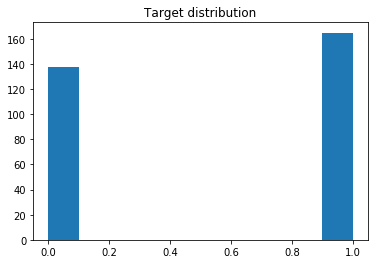

In [5]:
plt.hist(df['target'])
plt.title('Target distribution')
plt.show()

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Target data are balanced as we can see above

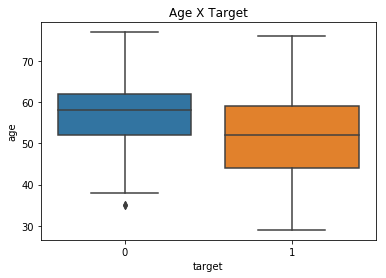

In [7]:
#age X target
ax= sns.boxplot(x = df.target, y = df.age)
plt.title('Age X Target')
plt.show()

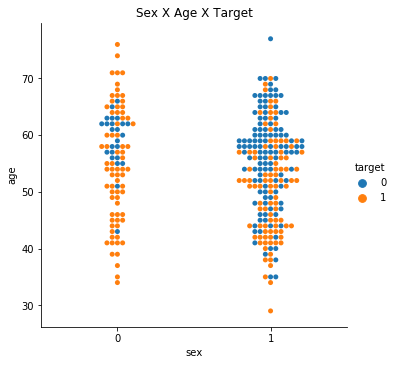

In [8]:
#Correlation between sex, age and the target
sns.catplot(x="sex", y="age",kind="swarm", hue="target" , data=df)
plt.title('Sex X Age X Target')
plt.show()

**Pre processing**

In [9]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
y = df.target
X = df.drop(columns = "target")
print(y.shape)
print(X.shape)

(303,)
(303, 13)


In [13]:
#Stantarding
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

In [14]:
X = scaler.transform(X)

In [15]:
#Split in to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
#Getting validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

**Importing models and training**

In [17]:
#Models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC  #support vector Machine
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes

#Cross validation
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix, classification_report #for confusion matrix

In [18]:
#LogisticRegression
modelLR = LogisticRegression()

In [19]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'penalty':['l2', 'none'], 
    'fit_intercept':[False, True], 
    'solver':['newton-cg', 'lbfgs', 'sag', 'saga'], 
    'max_iter':[50, 75, 100, 125], 
}

In [20]:
clfLR = GridSearchCV(modelLR, hyperparameter_grid, cv=5, n_jobs=-1)

In [21]:
clfLR.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'fit_intercept': [False, True],
                         'max_iter': [50, 75, 100, 125],
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [22]:
validationLR = clfLR.predict(X_val)
print('The validation score of the Logistic Regression is',metrics.accuracy_score(validationLR,y_val))
confusion_matrix(y_val,validationLR)

The validation score of the Logistic Regression is 0.8163265306122449


array([[15,  5],
       [ 4, 25]])

In [23]:
predictionLR = clfLR.predict(X_test)
print('The testing score of the Logistic Regression is',metrics.accuracy_score(predictionLR,y_test))
print(classification_report(y_test, predictionLR))
print('\n')
print(confusion_matrix(y_test,predictionLR))

The testing score of the Logistic Regression is 0.7868852459016393
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.79      0.86      0.83        36

    accuracy                           0.79        61
   macro avg       0.78      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



[[17  8]
 [ 5 31]]


In [24]:
#SVM
modelSVM = SVC()
hyperparameter_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clfSVM = GridSearchCV(modelSVM, hyperparameter_grid, cv=10)


clfSVM.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
validationSVM = clfSVM.predict(X_test)
print('The test score of the Logistic Regression is',metrics.accuracy_score(validationLR,y_val))
print(classification_report(y_test, validationSVM))
print('\n')
print(confusion_matrix(y_test,validationSVM))

The test score of the Logistic Regression is 0.8163265306122449
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.80      0.92      0.86        36

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



[[17  8]
 [ 3 33]]


In [26]:
#DecisionTreeClassifier
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
validationDT = modelDT.predict(X_test)
print('The test score of the Logistic Regression is',metrics.accuracy_score(validationLR,y_val))
print(classification_report(y_test, validationDT))
print('\n')
print(confusion_matrix(y_test,validationDT))

The test score of the Logistic Regression is 0.8163265306122449
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.88      0.81      0.84        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



[[21  4]
 [ 7 29]]


In [28]:
#RandomForestClassifier
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
predRF = modelRF.predict(X_test)
#print('The test score of the Logistic Regression is',metrics.accuracy_score(validationLR,y_val))
print(classification_report(y_test, predRF))
print('\n')
print(confusion_matrix(y_test,predRF))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



[[20  5]
 [ 7 29]]


In [30]:
#KNN
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
valKNN = modelKNN.predict(X_val)
print(classification_report(y_val, valKNN))
print('\n')
print(confusion_matrix(y_val,valKNN))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.84      0.93      0.89        29

    accuracy                           0.86        49
   macro avg       0.86      0.84      0.85        49
weighted avg       0.86      0.86      0.85        49



[[15  5]
 [ 2 27]]


In [32]:
predKNN = modelKNN.predict(X_test)
print(classification_report(y_test, predKNN))
print('\n')
print(confusion_matrix(y_test,predKNN))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.80      0.89      0.84        36

    accuracy                           0.80        61
   macro avg       0.80      0.78      0.79        61
weighted avg       0.80      0.80      0.80        61



[[17  8]
 [ 4 32]]


In [33]:
#Naive Bayes
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
valNB = modelNB.predict(X_val)
print(classification_report(y_val, valNB))
print('\n')
print(confusion_matrix(y_val,valNB))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.89      0.86      0.88        29

    accuracy                           0.86        49
   macro avg       0.85      0.86      0.85        49
weighted avg       0.86      0.86      0.86        49



[[17  3]
 [ 4 25]]


In [35]:
predNB = modelNB.predict(X_test)
print(classification_report(y_test, predNB))
print('\n')
print(confusion_matrix(y_test,predNB))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.87      0.92      0.89        36

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



[[20  5]
 [ 3 33]]
